# Mercado Livre API - Overview da API a partir de uma query
Esse notebook apresenta diferentes métricas que se pode obter ao realizar uma query à API do Mercado Libre. 

(No momento, experimentando com diferentes visualizações. Ao finalizar uma versão, a descrição dos passos será completada de acordo).

## Imports e configurações gerais

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import requests
import pandas as pd

from pandas import Series, DataFrame

from IPython.core.display import Image, display

# Charts styling
#plt.style.use('fivethirtyeight')
#plt.style.use('bmh')
plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8 # increases figure size
matplotlib.rcParams.update({'font.size': 14}) # increases chart font size
rcParams['font.family'] = 'Arial Narrow'

In [2]:
# style to enhance df viz, from https://github.com/brandon-rhodes/pycon-pandas-tutorial
from IPython.core.display import HTML
css = open('style-table.css').read() #+ open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Parâmetros de entrada

In [3]:
# Sets input parameters 
DAYS_AGO = 365 # days to look back in visits history
ITEMS_TO_QUERY = 200 # max. number of results returned from query (max. permitted by ML is 200)
ITEMS_TO_PLOT = 10 # list of "ITEMS_TO_PLOT" top sold items; e.g. if 10, visits from top 10 sold itens will be plotted

## Busca de itens a partir de uma query definida pelo usuário

- Get dos resultados da busca
- Ordenamento dos itens por mais vendidos e remoção de itens duplicados
- Corte de itens pelo limite *ITEMS_TO_PLOT*

In [4]:
### REQUEST: gets items according to search for 'query' 

#query = "kit painel solar"
query = input('Qual a query desejada? ')

url = 'https://api.mercadolibre.com/sites/MLB/search?q=' + query +'&limit=' + str(ITEMS_TO_QUERY)
print('Buscando por "' + query + '"...')
data = requests.get(url).json()

results = data["results"] # saves content from json in variable
df = DataFrame(results) # converts to a pandas df
print(str(len(df)) + ' itens encontrados.')

Qual a query desejada? kit painel solar
Buscando por "kit painel solar"...
138 itens encontrados.


In [5]:
#df.seller[0]
#df.columns
df.head()

,accepts_mercadopago,address,attributes,available_quantity,buying_mode,category_id,condition,currency_id,differential_pricing,id,...,price,seller,seller_address,shipping,site_id,sold_quantity,stop_time,subtitle,thumbnail,title
0,True,"{'state_id': 'BR-SP', 'city_name': 'São Paulo'...",[],5,buy_it_now,MLB30171,new,BRL,NaN,MLB754575430,...,798.00,"{'tags': [], 'car_dealer': False, 'id': 267878...","{'address_line': '', 'country': {'id': 'BR', '...","{'free_shipping': False, 'mode': 'not_specified'}",MLB,25,2036-03-30T18:45:00.000Z,None,http://mlb-s1-p.mlstatic.com/804905-MLB2510574...,Kit Painel Solar+ Bateria+ Controlador+ Invers...
1,True,"{'state_id': 'BR-SC', 'city_name': 'Jaraguá do...",[],4,buy_it_now,MLB30171,new,BRL,{'id': 31499179},MLB794780755,...,7301.99,"{'tags': [], 'car_dealer': False, 'id': 144594...","{'address_line': '', 'country': {'id': 'BR', '...","{'free_shipping': False, 'mode': 'not_specified'}",MLB,0,2036-09-04T14:10:42.000Z,None,http://mlb-s1-p.mlstatic.com/814905-MLB2510385...,Kit Gerador On Grid Tie Placa Solar Painel Sol...
2,True,"{'state_id': 'BR-MG', 'city_name': 'Ipatinga',...",[],962,buy_it_now,MLB30171,new,BRL,NaN,MLB695065272,...,1459.00,"{'tags': [], 'car_dealer': False, 'id': 563484...","{'address_line': '', 'country': {'id': 'BR', '...","{'free_shipping': False, 'mode': 'custom'}",MLB,56,2035-09-26T13:49:16.000Z,None,http://mlb-s1-p.mlstatic.com/182101-MLB2027923...,Kit Painel Solar Placa Célula Fotovoltaica 150...
3,True,"{'state_id': 'BR-RJ', 'city_name': 'Rio de Jan...",[],9755,buy_it_now,MLB30171,new,BRL,{'id': 31499179},MLB765601179,...,904.99,"{'tags': [], 'car_dealer': False, 'id': 156690...","{'address_line': '', 'country': {'id': 'BR', '...","{'free_shipping': False, 'mode': 'not_specified'}",MLB,8,2036-05-14T10:56:48.000Z,None,http://mlb-s1-p.mlstatic.com/301321-MLB2072844...,Kit Placa Painel Solar 200w + Controlador De C...
4,True,"{'state_id': 'BR-MG', 'city_name': 'Ipatinga',...",[],9,buy_it_now,MLB30171,new,BRL,NaN,MLB727650542,...,829.00,"{'tags': [], 'car_dealer': False, 'id': 563484...","{'address_line': '', 'country': {'id': 'BR', '...","{'free_shipping': False, 'mode': 'custom'}",MLB,19,2035-12-01T22:45:32.000Z,None,http://mlb-s1-p.mlstatic.com/490305-MLB2085344...,Kit Painel Placa Energia Solar 150w + Controla...


In [6]:
df = df[['id', 'title', 'price', 'sold_quantity', 'available_quantity', 'permalink', 'thumbnail', 'seller_address', 'seller', 'stop_time']] # gets only interesting columns
ids = df.id.values[0:ITEMS_TO_PLOT] # gets top sold items ML ids in a list
df = df.set_index('id') # sets index to id

In [7]:
# sorts items by sold quantity and deletes duplicates with less sales (assuming they'd be 0)
df = df.sort_values(by='sold_quantity', ascending=False)
df = df.drop_duplicates(subset=['title'], keep='first')

# adds revenue column by an operation with sold_quantity and price
df['revenue'] = df['sold_quantity'] * df['price']
total_revenue = df['revenue'].sum()

# fixes 'stop_time' to proper date format
df['stop_time'] = pd.to_datetime(df['stop_time'])

# calculates start time and days ago
start_times = []
days_ago = []

today = dt.datetime.today()

for index, row in df.iterrows():
    stop_time = df.loc[index, 'stop_time']
    #df['start_time'][index] = date.replace(year = date.year - 20)
    start = stop_time
    start = start.replace(year = start.year - 20)
    ago = (today - start).days

    days_ago.append(ago)
    start_times.append(start)
    #print(str(start) + ' ' + str(stop_time))

df['start_time'] = start_times
df['days_ago'] = days_ago

#df
df.head()

,title,price,sold_quantity,available_quantity,permalink,thumbnail,seller_address,seller,stop_time,revenue,start_time,days_ago
id,,,,,,,,,,,,
MLB712968328,Kit Painel Solar Fotovoltaico E Controlador De...,354.9,97,6,http://produto.mercadolivre.com.br/MLB-7129683...,http://mlb-s1-p.mlstatic.com/13411-MLB20076556...,"{'address_line': '', 'country': {'id': 'BR', '...","{'tags': [], 'car_dealer': False, 'id': 155747...",2035-10-08 12:28:56,34425.3,2015-10-08 12:28:56,380
MLB684532632,Kit Demonstrativo Célula Painel Placa Energia ...,29.9,71,948,http://produto.mercadolivre.com.br/MLB-6845326...,http://mlb-s2-p.mlstatic.com/113605-MLB2505261...,"{'address_line': '', 'country': {'id': 'BR', '...","{'tags': [], 'car_dealer': False, 'id': 154435...",2035-07-25 14:04:19,2122.9,2015-07-25 14:04:19,455
MLB695065272,Kit Painel Solar Placa Célula Fotovoltaica 150...,1459.0,56,962,http://produto.mercadolivre.com.br/MLB-6950652...,http://mlb-s1-p.mlstatic.com/182101-MLB2027923...,"{'address_line': '', 'country': {'id': 'BR', '...","{'tags': [], 'car_dealer': False, 'id': 563484...",2035-09-26 13:49:16,81704.0,2015-09-26 13:49:16,392
MLB696113241,Kit Bomba Dágua Shurflo Com Painél Solar De 14...,1595.0,30,9,http://produto.mercadolivre.com.br/MLB-6961132...,http://mlb-s1-p.mlstatic.com/591901-MLB2044380...,"{'address_line': '', 'country': {'id': 'BR', '...","{'tags': [], 'car_dealer': False, 'id': 503991...",2036-03-26 12:09:24,47850.0,2016-03-26 12:09:24,210
MLB754575430,Kit Painel Solar+ Bateria+ Controlador+ Invers...,798.0,25,5,http://produto.mercadolivre.com.br/MLB-7545754...,http://mlb-s1-p.mlstatic.com/804905-MLB2510574...,"{'address_line': '', 'country': {'id': 'BR', '...","{'tags': [], 'car_dealer': False, 'id': 267878...",2036-03-30 18:45:00,19950.0,2016-03-30 18:45:00,206


## Resultado da busca

Os 10 itens mais vendidos: 



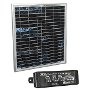

MLB712968328 - Kit Painel Solar Fotovoltaico E Controlador De Carga
http://produto.mercadolivre.com.br/MLB-712968328-kit-painel-solar-fotovoltaico-e-controlador-de-carga-_JM



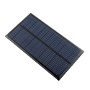

MLB684532632 - Kit Demonstrativo Célula Painel Placa Energia Solar 6v 150ma
http://produto.mercadolivre.com.br/MLB-684532632-kit-demonstrativo-celula-painel-placa-energia-solar-6v-150ma-_JM



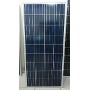

MLB695065272 - Kit Painel Solar Placa Célula Fotovoltaica 150w + Acessórios
http://produto.mercadolivre.com.br/MLB-695065272-kit-painel-solar-placa-celula-fotovoltaica-150w-acessorios-_JM



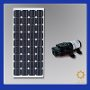

MLB696113241 - Kit Bomba Dágua Shurflo Com Painél Solar De 140w ( Placa )
http://produto.mercadolivre.com.br/MLB-696113241-kit-bomba-dagua-shurflo-com-painel-solar-de-140w-placa--_JM



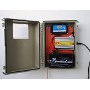

MLB754575430 - Kit Painel Solar+ Bateria+ Controlador+ Inversor 12v P/110v
http://produto.mercadolivre.com.br/MLB-754575430-kit-painel-solar-bateria-controlador-inversor-12v-p110v-_JM



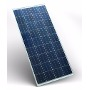

MLB727650542 - Kit Painel Placa Energia Solar 150w + Controlador 20a + Cabo
http://produto.mercadolivre.com.br/MLB-727650542-kit-painel-placa-energia-solar-150w-controlador-20a-cabo-_JM



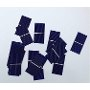

MLB779069064 - Kit Célula Solar Para Montar Painel 10w 12v.
http://produto.mercadolivre.com.br/MLB-779069064-kit-celula-solar-para-montar-painel-10w-12v-_JM



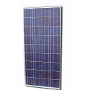

MLB765601179 - Kit Placa Painel Solar 200w + Controlador De Carga Solar 20a
http://produto.mercadolivre.com.br/MLB-765601179-kit-placa-painel-solar-200w-controlador-de-carga-solar-20a-_JM



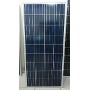

MLB773028235 - Kit Painel Placa Solar 150w + Bateria + Inversor + Cabos
http://produto.mercadolivre.com.br/MLB-773028235-kit-painel-placa-solar-150w-bateria-inversor-cabos-_JM



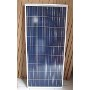

MLB760460786 - Kit Painel Placa Solar Fotovoltaica 150w + Cabos + Mc4
http://produto.mercadolivre.com.br/MLB-760460786-kit-painel-placa-solar-fotovoltaica-150w-cabos-mc4-_JM



In [8]:
# prints URLs from itens in chart

print('Os ' + str(ITEMS_TO_PLOT) + ' itens mais vendidos:', '\n')
for index, row in df.head(ITEMS_TO_PLOT).iterrows():
    display(Image(df.loc[index, 'thumbnail']))
    print(index + ' - ' + df.loc[index, 'title']) # uses loc taking advantage of indexing by id made previously
    print(df.loc[index, 'permalink'])
    print()

## Itens mais vendidos e seus preços

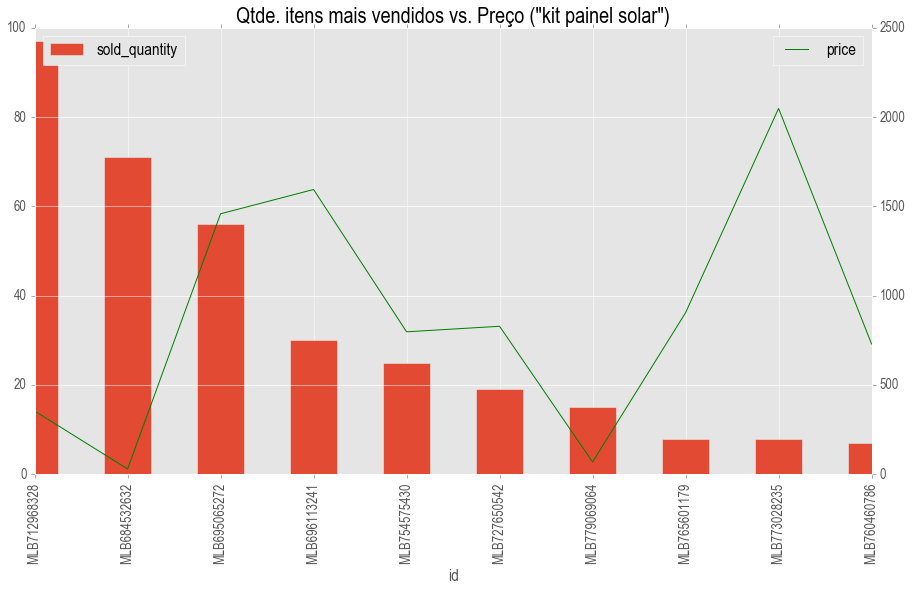

In [9]:
# sold quantity vs. unit price

# procedure to handle secondary Y axis
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

y0 = df.head(ITEMS_TO_PLOT).sold_quantity.plot(kind='bar', ax=ax0)#, label='Itens vendidos')
y1 = df.head(ITEMS_TO_PLOT).price.plot(secondary_y=True, style='g', ax=ax1)#, label='Preço unitário')
y0.legend(loc=2) # bar legend to the left
y1.legend(loc=0) # line legend to the right

plt.title('Qtde. itens mais vendidos vs. Preço ("' + query + '")', fontsize=22)
plt.show()
plt.close()

## Faturamento por item

O faturamento total ("kit painel solar") = R$ 299444.45


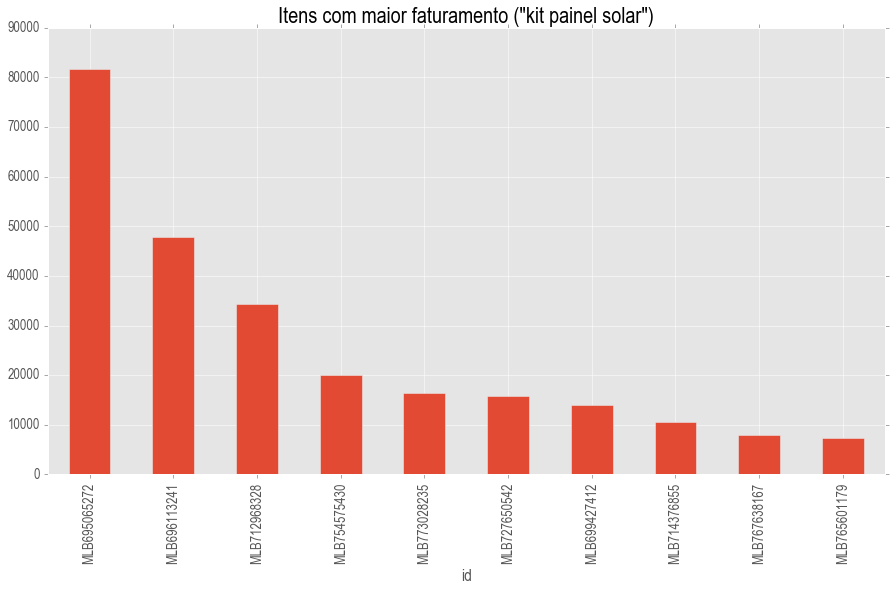

In [10]:
print('O faturamento total ("' + query + '") = R$ ' + str(total_revenue))
df['revenue'].sort_values(ascending=False).head(ITEMS_TO_PLOT).plot(kind='bar')
plt.title('Itens com maior faturamento ("' + query + '")', fontsize=22)

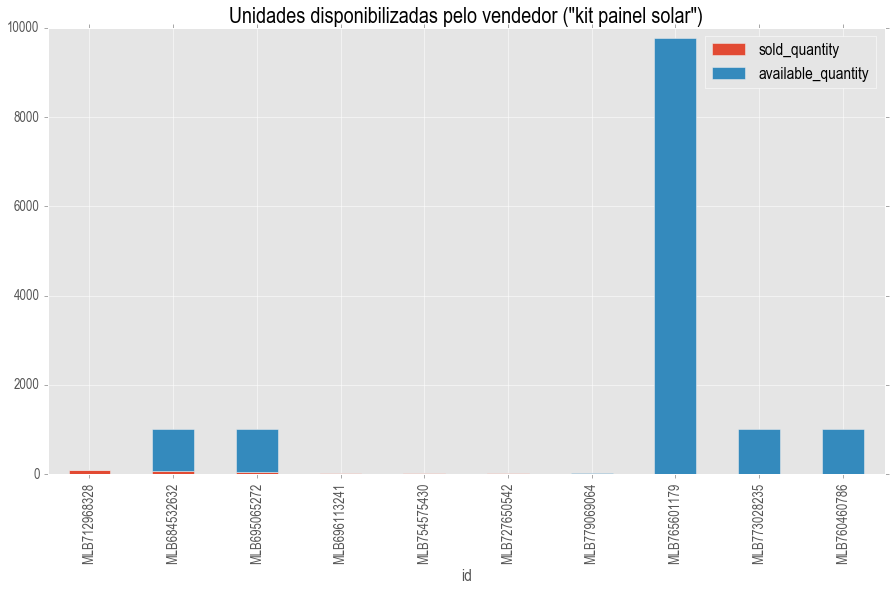

In [11]:
# total amount of each item (sold + stock)

df[['sold_quantity', 'available_quantity']].head(ITEMS_TO_PLOT).plot(kind='bar', stacked=True)
plt.title('Unidades disponibilizadas pelo vendedor ("' + query + '")', fontsize=22)

## Análise por cidade e estado (qtde. de anúncios e faturamento)

In [12]:
# location and stuff...

df2 = df # creates copy to play with

# extracting info from json/dict objects in cells

cities = [] # empty list to hold city names
states = [] # empty list to hold state names
sellers =[] # empty list to hold sellers ids

for index, row in df2.iterrows():
    cities.append(row['seller_address']['city']['name'])    
    states.append(row['seller_address']['state']['name'])    
    sellers.append(row['seller']['id'])    

df2['city'] = cities
df2['state'] = states
df2['seller_id'] = sellers
df2.head()

,title,price,sold_quantity,available_quantity,permalink,thumbnail,seller_address,seller,stop_time,revenue,start_time,days_ago,city,state,seller_id
id,,,,,,,,,,,,,,,
MLB712968328,Kit Painel Solar Fotovoltaico E Controlador De...,354.9,97,6,http://produto.mercadolivre.com.br/MLB-7129683...,http://mlb-s1-p.mlstatic.com/13411-MLB20076556...,"{'address_line': '', 'country': {'id': 'BR', '...","{'tags': [], 'car_dealer': False, 'id': 155747...",2035-10-08 12:28:56,34425.3,2015-10-08 12:28:56,380,São Paulo,São Paulo,155747044
MLB684532632,Kit Demonstrativo Célula Painel Placa Energia ...,29.9,71,948,http://produto.mercadolivre.com.br/MLB-6845326...,http://mlb-s2-p.mlstatic.com/113605-MLB2505261...,"{'address_line': '', 'country': {'id': 'BR', '...","{'tags': [], 'car_dealer': False, 'id': 154435...",2035-07-25 14:04:19,2122.9,2015-07-25 14:04:19,455,Rio Claro,São Paulo,15443556
MLB695065272,Kit Painel Solar Placa Célula Fotovoltaica 150...,1459.0,56,962,http://produto.mercadolivre.com.br/MLB-6950652...,http://mlb-s1-p.mlstatic.com/182101-MLB2027923...,"{'address_line': '', 'country': {'id': 'BR', '...","{'tags': [], 'car_dealer': False, 'id': 563484...",2035-09-26 13:49:16,81704.0,2015-09-26 13:49:16,392,Ipatinga,Minas Gerais,56348431
MLB696113241,Kit Bomba Dágua Shurflo Com Painél Solar De 14...,1595.0,30,9,http://produto.mercadolivre.com.br/MLB-6961132...,http://mlb-s1-p.mlstatic.com/591901-MLB2044380...,"{'address_line': '', 'country': {'id': 'BR', '...","{'tags': [], 'car_dealer': False, 'id': 503991...",2036-03-26 12:09:24,47850.0,2016-03-26 12:09:24,210,São Paulo,São Paulo,503991
MLB754575430,Kit Painel Solar+ Bateria+ Controlador+ Invers...,798.0,25,5,http://produto.mercadolivre.com.br/MLB-7545754...,http://mlb-s1-p.mlstatic.com/804905-MLB2510574...,"{'address_line': '', 'country': {'id': 'BR', '...","{'tags': [], 'car_dealer': False, 'id': 267878...",2036-03-30 18:45:00,19950.0,2016-03-30 18:45:00,206,São Paulo,São Paulo,26787888


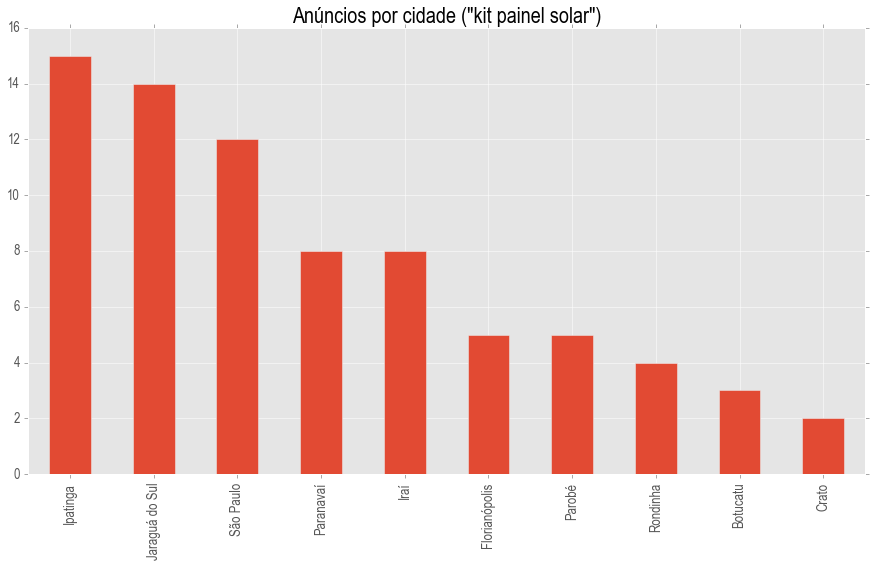

In [13]:
# plots itens by cities

df2.city.value_counts().head(10).plot(kind='bar')
plt.title('Anúncios por cidade ("' + query + '")', fontsize=22)

O faturamento total ("kit painel solar") = R$ 299444.45


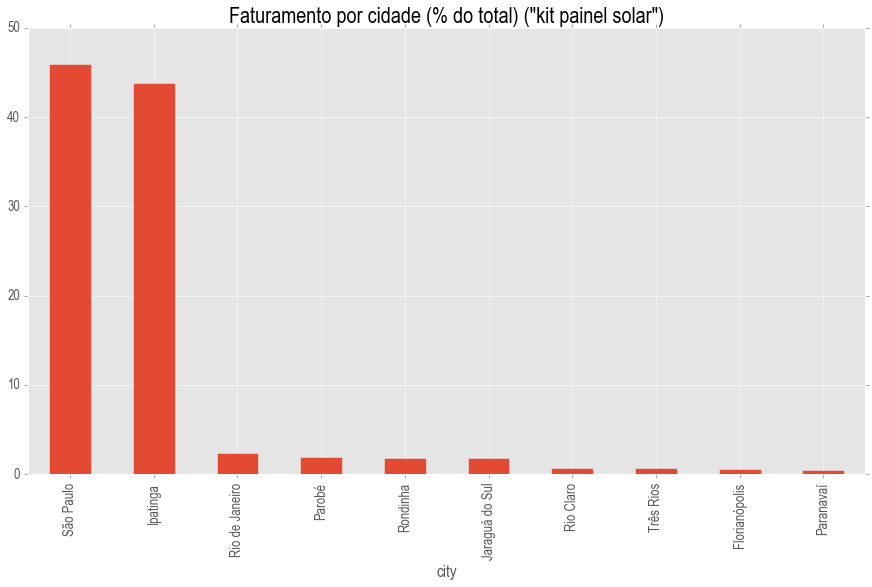

In [14]:
# revenue per city
print('O faturamento total ("' + query + '") = R$ ' + str(total_revenue))

revenue_share_by_city = (df2.groupby('city').sum().revenue / total_revenue) * 100 # aggregates data by city, sums by revenue and gets proportion from total
revenue_share_by_city.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Faturamento por cidade (% do total) ("' + query + '")', fontsize=22)

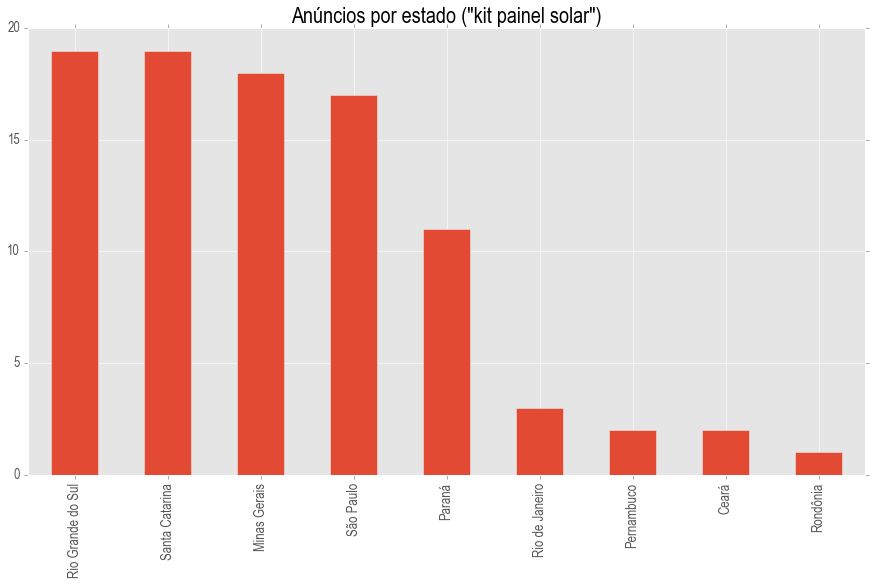

In [15]:
# plots itens by states
df2.state.value_counts().plot(kind='bar')
plt.title('Anúncios por estado ("' + query + '")', fontsize=22)

O faturamento total ("kit painel solar") = R$ 299444.45


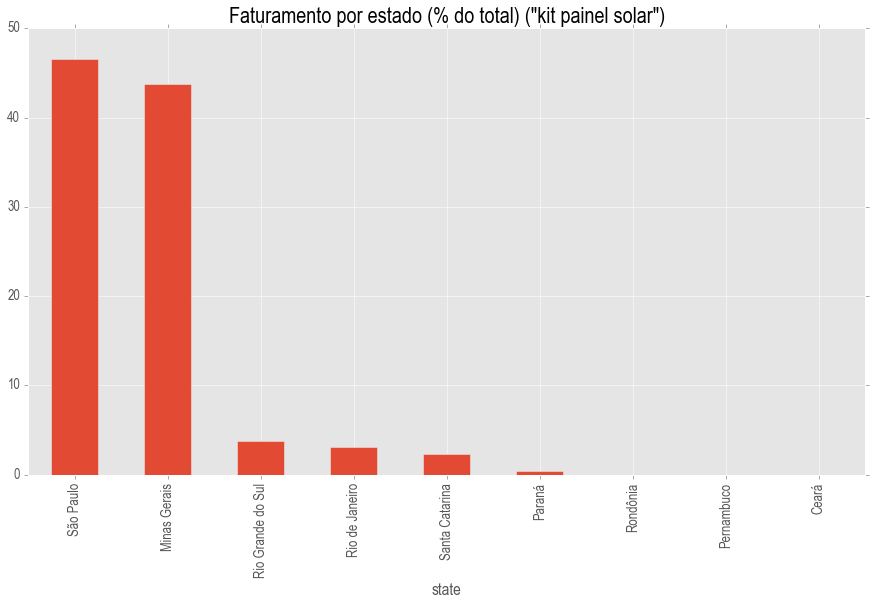

In [16]:
print('O faturamento total ("' + query + '") = R$ ' + str(total_revenue))

revenue_share_by_state = (df2.groupby('state').sum().revenue / total_revenue) * 100
revenue_share_by_state.sort_values(ascending=False).plot(kind='bar')
plt.title('Faturamento por estado (% do total) ("' + query + '")', fontsize=22)

## Análise por vendedores

In [17]:
sellers_df = df2.groupby('seller_id').sum() # aggregates by sellers id, summing up the columns
sellers_df.price = df2.groupby('seller_id').mean().price # substitutes sum of prices by mean price by seller
sellers_df = sellers_df.rename(columns={'price': 'average_price'})
sellers_df.head()

,average_price,sold_quantity,available_quantity,revenue,days_ago
seller_id,,,,,
503991,2445.00,40,21,76100.00,987
15443556,29.90,71,948,2122.90,455
15669086,904.99,8,9755,7239.92,161
26787888,759.00,41,15,22395.00,448
48505973,36.96,0,1,0.00,96


O faturamento total ("kit painel solar") = R$ 299444.45


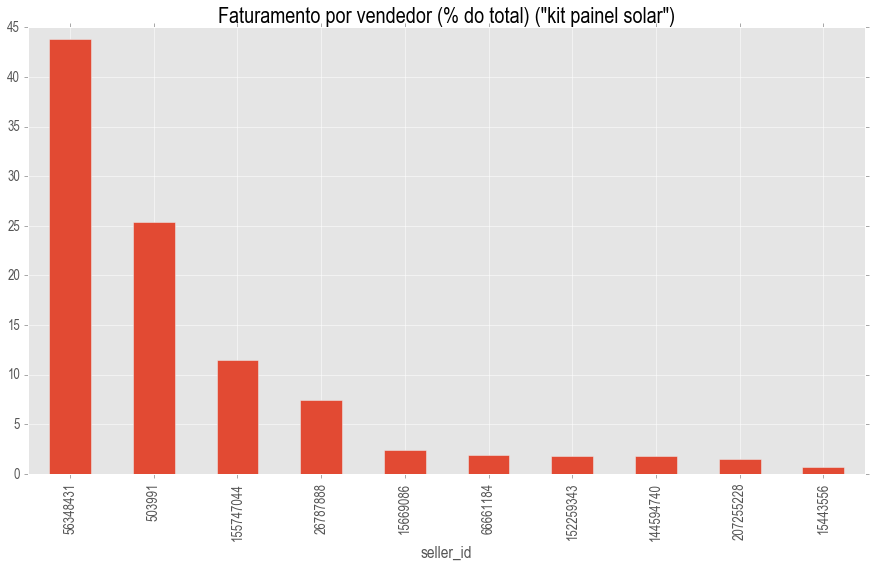

In [18]:
print('O faturamento total ("' + query + '") = R$ ' + str(total_revenue))

sellers_df = sellers_df.sort_values('revenue', ascending=False)
#sellers_df.revenue.sort_values(ascending=False).head(20).plot(kind='bar')

revenue_share_by_seller = (sellers_df['revenue'] / total_revenue) * 100
revenue_share_by_seller.head(10).plot(kind='bar')
plt.title('Faturamento por vendedor (% do total) ("' + query + '")', fontsize=22)
#sellers_df.head()

### Vendedor e itens como índices
Verificar como operar e se é útil de alguma forma...

In [19]:
# groups sellers and items, and then ...?
s = df2.reset_index()
s = s.groupby(['seller_id', 'id', 'permalink']).sum() # aggregates data by id and permalink to "save" them from being hidden

# sets id and permalink to be data in df
s = s.reset_index('id')
s = s.reset_index('permalink')

#reorder columns to make it readable
s = s[['id', 'sold_quantity', 'price', 'revenue', 'available_quantity', 'permalink']] 

s.head(10)

,id,sold_quantity,price,revenue,available_quantity,permalink
seller_id,,,,,,
503991,MLB696113241,30,1595.00,47850.00,9,http://produto.mercadolivre.com.br/MLB-6961132...
503991,MLB699427412,5,2795.00,13975.00,3,http://produto.mercadolivre.com.br/MLB-6994274...
503991,MLB714376855,3,3495.00,10485.00,3,http://produto.mercadolivre.com.br/MLB-7143768...
503991,MLB753464872,2,1895.00,3790.00,6,http://produto.mercadolivre.com.br/MLB-7534648...
15443556,MLB684532632,71,29.90,2122.90,948,http://produto.mercadolivre.com.br/MLB-6845326...
15669086,MLB765601179,8,904.99,7239.92,9755,http://produto.mercadolivre.com.br/MLB-7656011...
26787888,MLB754575430,25,798.00,19950.00,5,http://produto.mercadolivre.com.br/MLB-7545754...
26787888,MLB771395114,1,1410.00,1410.00,2,http://produto.mercadolivre.com.br/MLB-7713951...
26787888,MLB779069064,15,69.00,1035.00,8,http://produto.mercadolivre.com.br/MLB-7790690...


## Análise da data de anúncio dos itens (recenticidade)

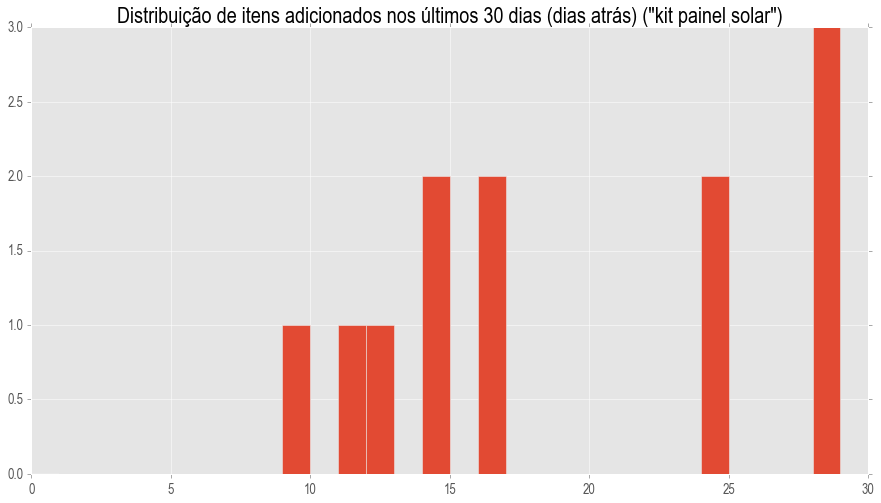

In [20]:
_range = (0, 30)
df.days_ago.hist(range=_range, bins=30)
plt.title('Distribuição de itens adicionados nos últimos 30 dias (dias atrás) ("' + query + '")', fontsize=22)

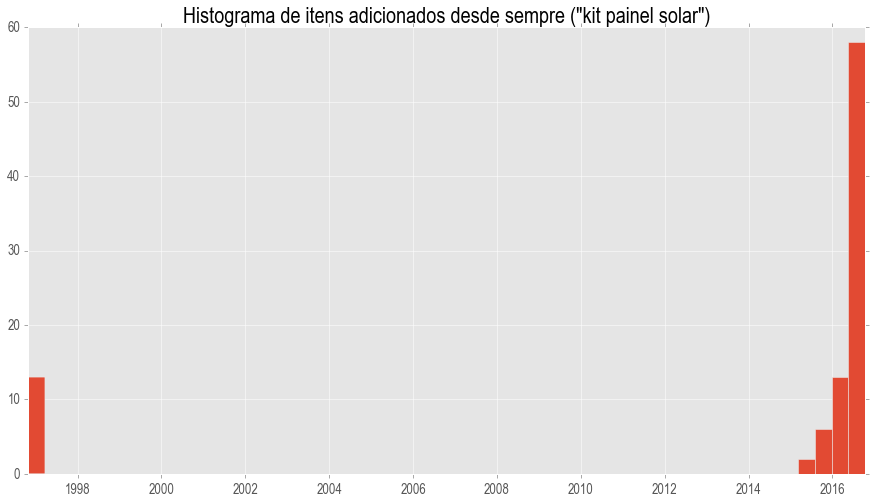

In [21]:
s = df

s.start_time.hist(bins=50)
plt.title('Histograma de itens adicionados desde sempre ("' + query + '")', fontsize=22)

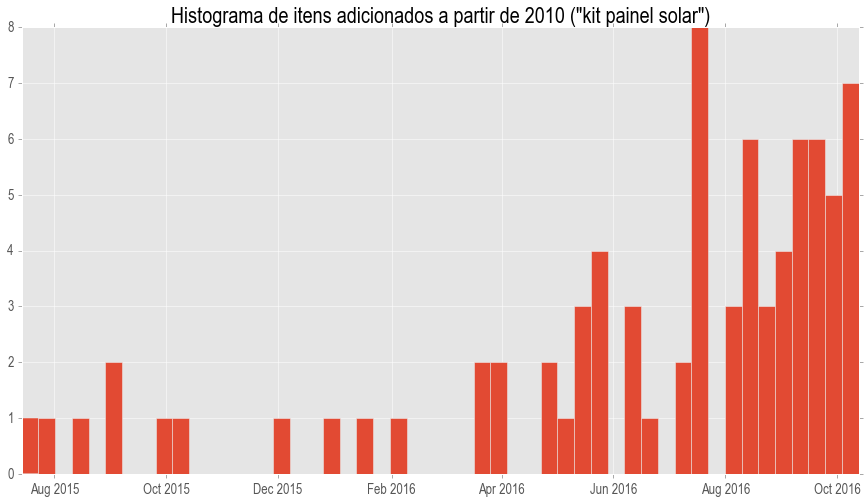

In [22]:
s = df[(df.start_time > '2010-01-01')] # filter dates later than 2010

s.start_time.hist(bins=50)
plt.title('Histograma de itens adicionados a partir de 2010 ("' + query + '")', fontsize=22)

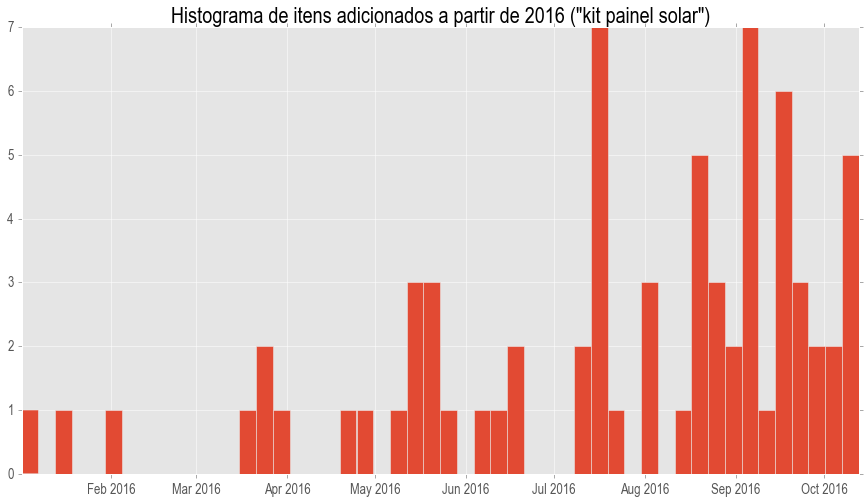

In [23]:
s = df[(df.start_time > '2016-01-01')] # filter dates later than 2010

s.start_time.hist(bins=50)
plt.title('Histograma de itens adicionados a partir de 2016 ("' + query + '")', fontsize=22)

Os 10 itens mais recentes: 



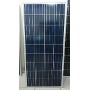

MLB804575184 - Kit Painel Solar Placa 150w + Inversor 1500w + Bateria 70ah
http://produto.mercadolivre.com.br/MLB-804575184-kit-painel-solar-placa-150w-inversor-1500w-bateria-70ah-_JM
Adicionado há 9 dias.
0 unidades já vendidas.



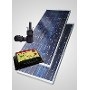

MLB804141076 - Kit 2 Placa Solar Painel Solar 150w + Controlador 20a
http://produto.mercadolivre.com.br/MLB-804141076-kit-2-placa-solar-painel-solar-150w-controlador-20a-_JM
Adicionado há 11 dias.
0 unidades já vendidas.



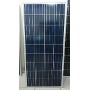

MLB803874163 - Kit Painel Solar Placa 150w + Bateria 165ah + Inversor 2000w
http://produto.mercadolivre.com.br/MLB-803874163-kit-painel-solar-placa-150w-bateria-165ah-inversor-2000w-_JM
Adicionado há 12 dias.
0 unidades já vendidas.



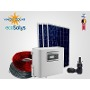

MLB803319447 - Kit Gerador On Grid Tie Placa Solar Painel Solar 75 Kwh/mês
http://produto.mercadolivre.com.br/MLB-803319447-kit-gerador-on-grid-tie-placa-solar-painel-solar-75-kwhms-_JM
Adicionado há 14 dias.
0 unidades já vendidas.



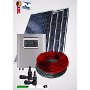

MLB803318363 - Kit Gerador On Grid Tie Placa Solar Painel Solar 190 Kwh/mês
http://produto.mercadolivre.com.br/MLB-803318363-kit-gerador-on-grid-tie-placa-solar-painel-solar-190-kwhms-_JM
Adicionado há 14 dias.
0 unidades já vendidas.



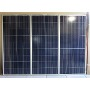

MLB802712622 - Kit Energia Painel Solar 150w Offgrid + Bateria + Acessórios
http://produto.mercadolivre.com.br/MLB-802712622-kit-energia-painel-solar-150w-offgrid-bateria-acessorios-_JM
Adicionado há 16 dias.
0 unidades já vendidas.



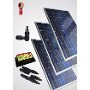

MLB802832931 - Kit 3 Placa Solar 255w 24v Gerador Painel Solar
http://produto.mercadolivre.com.br/MLB-802832931-kit-3-placa-solar-255w-24v-gerador-painel-solar-_JM
Adicionado há 16 dias.
0 unidades já vendidas.



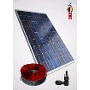

MLB800805798 - Kit Gerador Painel Placa Solar 255w + Cabos + Mc4
http://produto.mercadolivre.com.br/MLB-800805798-kit-gerador-painel-placa-solar-255w-cabos-mc4-_JM
Adicionado há 24 dias.
0 unidades já vendidas.



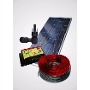

MLB800812684 - Kit Placa Painel Solar Energia 150w 12v Cabo Flexivel 4mm
http://produto.mercadolivre.com.br/MLB-800812684-kit-placa-painel-solar-energia-150w-12v-cabo-flexivel-4mm-_JM
Adicionado há 24 dias.
1 unidades já vendidas.



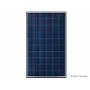

MLB799875076 - Kit 2 Painel Solar Gerador Energia Yingl 36 Celulas 150w
http://produto.mercadolivre.com.br/MLB-799875076-kit-2-painel-solar-gerador-energia-yingl-36-celulas-150w-_JM
Adicionado há 28 dias.
0 unidades já vendidas.



In [24]:
print('Os ' + str(ITEMS_TO_PLOT) + ' itens mais recentes:', '\n')

recent_itens_df = df.sort_values('days_ago', ascending=True)

for index, row in recent_itens_df.head(ITEMS_TO_PLOT).iterrows():
    display(Image(df.loc[index, 'thumbnail'])) 
    print(index + ' - ' + df.loc[index, 'title']) # uses loc taking advantage of indexing by id made previously
    print(df.loc[index, 'permalink'])
    print('Adicionado há ' + str(df.loc[index, 'days_ago']) + ' dias.')
    print(str(df.loc[index, 'sold_quantity']) + ' unidades já vendidas.')
    print()

    

---
## Request por visitas dos itens filtrados e ordenados

- Get das visitas dos itens desde *DAYS_AGO* dias atrás 
- Organização dos resultados em um único **df** indexado por data
- Headers das colunas editados para serem as ids dos itens

In [25]:
#### REQUEST: get visits (by days) for the items in 'ids'

days = DAYS_AGO # number of days ago to consider
ids_string = ','.join(ids) # makes comma-separated string from list to use in URL

url = 'https://api.mercadolibre.com/items/visits/time_window?ids=' + ids_string +'&last=' + str(days) + '&unit=day'
data = requests.get(url).json()

visits_df = DataFrame(data[0]['results']) # initialize a df with the first item out of 10 (top ten in ids_string)
visits_df = visits_df[['date', 'total']] # gets only main columns
visits_df.columns = ['date', data[0]['item_id']] # renames 'total' to item's ID

column_headers = [] # list to store item ids used as column headers
column_headers.append(data[0]['item_id'])

# iterates over data items to merge all 'total' columns into same df
for item in data[1:]:
    results = item['results']
    df_temp = DataFrame(results)
    df_temp = df_temp[['date', 'total']]
    df_temp.columns = ['date', item['item_id']]
    column_headers.append(item['item_id'])
    visits_df = pd.merge(visits_df, df_temp, on='date')
    
#print(column_headers)
#visits_df.head()

In [26]:
# fixes df, parsing 'date' properly and setting as index column
visits_df['date'] = pd.to_datetime(visits_df['date'])
visits_df = visits_df.set_index('date')

visits_df.head()

,MLB754575430,MLB794780755,MLB695065272,MLB765601179,MLB727650542,MLB712968328,MLB779069064,MLB699427412,MLB702240163,MLB771395114
date,,,,,,,,,,
2015-10-23 04:00:00,0,0,151,0,0,95,0,74,40,0
2015-10-24 04:00:00,0,0,133,0,0,96,0,51,39,0
2015-10-25 04:00:00,0,0,140,0,0,89,0,59,47,0
2015-10-26 04:00:00,0,0,179,0,0,105,0,70,33,0
2015-10-27 04:00:00,0,0,162,0,0,106,0,79,49,0


### Visualização de visitas de 3 formas
- Visitas por dia (básico) (comentado)
- Média móvel de visitas (janela da média definida no código, ainda hardcoded)
- Soma acumulada de visitas (comentado)

In [27]:
#plt.figure()
#visits_df.plot(legend=True);
#plt.title('Histórico de visitas aos 10 itens mais vendidos ("' + query + '")', fontsize=22)

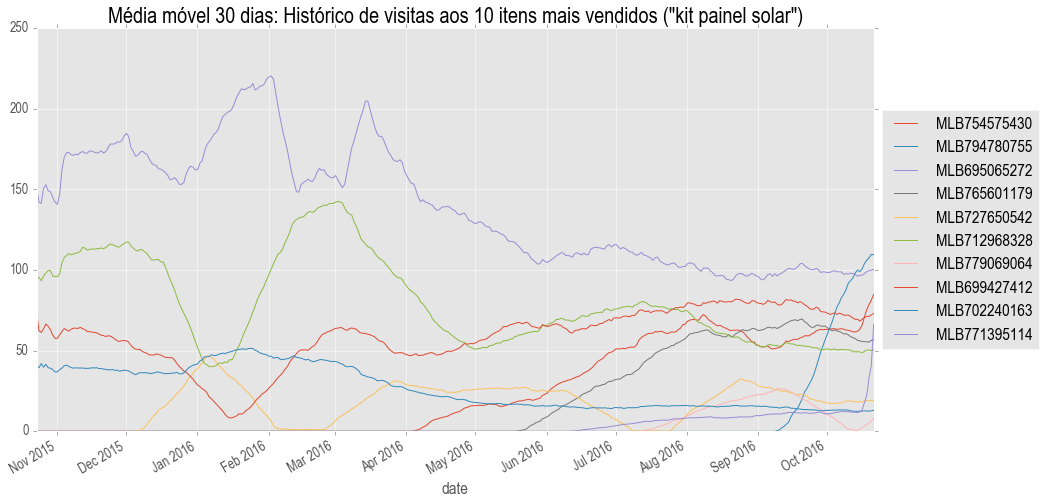

In [28]:
# calculates and plots visits' rolling mean (smoother curves)
#rolling_mean_df = visits_df.resample("1d").sum().fillna(0).rolling(window=30, min_periods=1).mean() #when resampling is needed

days_rolling = 30;
rolling_mean_df = visits_df.rolling(window=days_rolling, min_periods=1).mean() # window is the # of days evaluated in rolling mean
ax = rolling_mean_df.plot();
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # moves legend to the right outside
plt.title('Média móvel ' + str(days_rolling) + ' dias: Histórico de visitas aos ' + str(ITEMS_TO_PLOT) + ' itens mais vendidos ("' + query + '")', fontsize=22)

In [29]:
#cumulative_visits_df = visits_df.cumsum() # calculates accumulated values to plot
#plt.figure();
#cumulative_visits_df.plot(legend=True);
#plt.title('Soma acumulada: Histórico de visitas aos 10 itens mais vendidos ("' + query + '")', fontsize=22)

## Todo:
- Plot itens by seller location (map?)
- <s>Calculate revenue per seller (extract from seller dict in raw df)</s>
- Understand data aggregated by SELLER, not only by separate items
- Get location of the BUYERS, not only sellers
- Compare seller revenue with its ratings/feedbacks
- <s>Analyse itens by date and recently added itens</s>
- Play around with 'added_days_ago' and 'sold_quantity' = how appealing the product is
---
- Fix query handling for 0 results
- Fix query handling for null query as input
- Fix documentation/description
- Filter by minimum item price
---
- Add an index for jumping to parts (links for navigation)

## Todo (for version as a service):
- Compare sellers' itens with competitors: "how I am performing?"